In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchviz

In [2]:
nX, nH1, nH2, nY = 2, 5, 5, 1

In [3]:
model = nn.Sequential(
          nn.Linear(nX, nH1),
          nn.Sigmoid(),
          nn.Linear(nH1, nH2),
          nn.Sigmoid(),
          nn.Linear(nH2, nY),
          nn.Sigmoid() )

In [4]:
class ThreeLayersNet(nn.Module):
    def __init__(self, nX, nH1, nH2, nY):        
        super(ThreeLayersNet, self).__init__()
         
        self.fc1 = nn.Linear(nX, nH1)
        self.fc2 = nn.Linear(nH1, nH2)
        self.fc3 = nn.Linear(nH2, nY)
          
    def forward(self, x):
        x = self.fc1(x)
        x = nn.Sigmoid()(x)
        x = self.fc2(x)
        x = nn.Sigmoid()(x)
        x = self.fc3(x)
        x = nn.Sigmoid()(x)
        return x
          
model = ThreeLayersNet(2, 5, 5, 1)   

In [5]:
X = torch.rand (1200,2)                       
Y = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1,1)

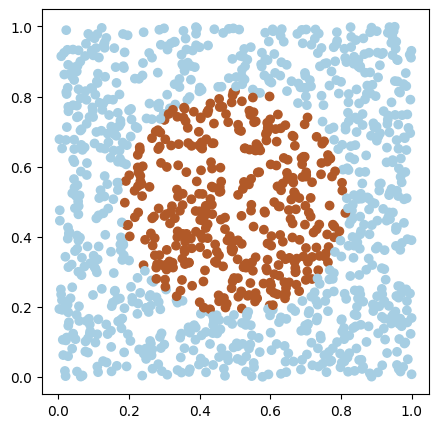

In [6]:
plt.figure (figsize=(5, 5))
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c=Y.numpy()[:,0],cmap=plt.cm.Paired)        
plt.show()

In [7]:
def fit(model, X,Y, batch_size=100, train=True):    
    model.train(train)                                 
    sumL, sumA, numB = 0, 0, int( len(X)/batch_size ) 

    for i in range(0, numB*batch_size, batch_size):          
        xb = X[i: i+batch_size]
        yb = Y[i: i+batch_size]

        y = model(xb)
        L = loss(y, yb)

        if train:
            optimizer.zero_grad()     
            L.backward()           
            optimizer.step()

        sumL += L.item()
        sumA += (y.round() == yb).float().mean()

    return sumL/numB,  sumA/numB   

In [8]:
model = ThreeLayersNet(2, 5, 5, 1)
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.8)

In [9]:
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y) )
 
epochs = 1000
for epoch in range(epochs):
    L,A = fit(model, X, Y)
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.6556 accuracy: 0.6533
epoch:     0 loss: 0.6297 accuracy: 0.6883
epoch:   100 loss: 0.6225 accuracy: 0.6883
epoch:   200 loss: 0.5919 accuracy: 0.6883
epoch:   300 loss: 0.2613 accuracy: 0.8783
epoch:   400 loss: 0.0786 accuracy: 0.9650
epoch:   500 loss: 0.0641 accuracy: 0.9650
epoch:   600 loss: 0.0570 accuracy: 0.9742
epoch:   700 loss: 0.0499 accuracy: 0.9742
epoch:   800 loss: 0.0573 accuracy: 0.9717
epoch:   900 loss: 0.0489 accuracy: 0.9775
epoch:   999 loss: 0.0542 accuracy: 0.9783


In [10]:
model_test = ThreeLayersNet(2, 5, 5, 1)
loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [11]:
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model_test, X,Y) )
 
epochs = 1000
for epoch in range(epochs):
    L,A = fit(model_test, X, Y)
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.2176 accuracy: 0.6883
epoch:     0 loss: 0.2176 accuracy: 0.6883
epoch:   100 loss: 0.2176 accuracy: 0.6883
epoch:   200 loss: 0.2176 accuracy: 0.6883
epoch:   300 loss: 0.2176 accuracy: 0.6883
epoch:   400 loss: 0.2176 accuracy: 0.6883
epoch:   500 loss: 0.2176 accuracy: 0.6883
epoch:   600 loss: 0.2176 accuracy: 0.6883
epoch:   700 loss: 0.2176 accuracy: 0.6883
epoch:   800 loss: 0.2176 accuracy: 0.6883
epoch:   900 loss: 0.2176 accuracy: 0.6883
epoch:   999 loss: 0.2176 accuracy: 0.6883


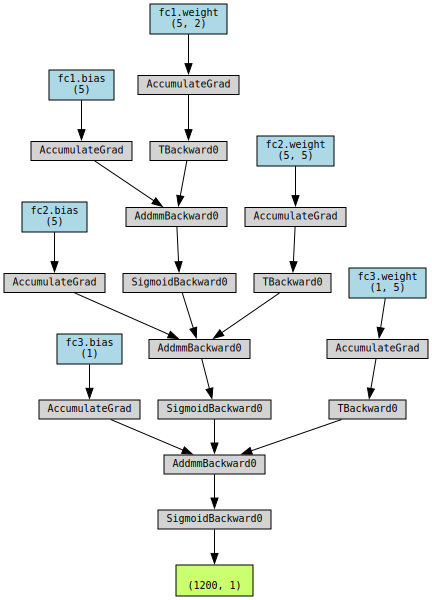

In [12]:
torchviz.make_dot(model(X), params = dict(model.named_parameters()))

**lr=0,05 for Adam:**

**epoch:   999 loss: 0.2276 accuracy: 0.6700**

**lr=0,001 (default) for Adam:**

**epoch:   999 loss: 0.2176 accuracy: 0.6883**

**Both cases show us that MSELoss + Adam optimizer as a bundle gave us much worse score and more losses rather BCELoss + SGD optimizer (epoch:   999 loss: 0.0542 accuracy: 0.9783).**